# **Les bases de l'animations**

Les représentations graphiques font partie des tâches fondamentales d’un physicien, d’un mathématicien, d’un data scientist… bref, de tout scientifique. Elles permettent de mieux comprendre et d’interpréter les résultats d’un projet scientifique. Pour une présentation encore plus fluide, dynamique et engageante, les animations constituent un atout précieux. Dans ce notebook, nous allons voir comment créer des animations à l’aide de la bibliothèque Python matplotlib (Mathematics Plotting Library).

### **C'est quoi une animation?** 

Une animation est composée d’une suite de frames (images fixes), chacune représentant une figure différente. Enchaînées rapidement ces frames donnent l’illusion du mouvement, d'une animation.
Avec matplotlib, les frames sont des figures, des representations graphiques. Alors comment se fait l'animation avec matplotlib?


### **Matplotlib**

C'est la librairie de visualisation la plus utilisée de Python pour faire des représentations en deux dimensions des tableaux NumPy

### **Matplotlib.animation.FuncAnimation**

La classe matplotlib.animation.FuncAnimation est utilisée pour faire de l'animation par appel répétitif d'une même fonction  qui met à jour nos données.

Les paramètres (les plus importants) pris par l'objet FuncAnimation sont les suivants:

- *fig*: La figure que l'on veut animer

- *func*: La fonction qui vas mettre a jour a chaque fois les données de notre figure

- *frames*: La durée de l'animation. il determine de le nombre d'images fixe qui vont etre enchainées pour creer le mouvenment

- *interval*: Determine le temps (en milliseconde) de passage d'une frame à une autre.

 

##### **Les differentes étapes pour creer une animation avec FuncAnimation**
 

1- Construire une figure initial vide et l'enregistrer dans une variable

2- Creer une fonction pour l'animation. 

3- Creer une animation en passant la Figure et la fonction d'animation à l'objet FuncAnimation et l'assigner à une variable.

4- Sauvegarder l'animation en utilisant l'une des méthodes suivantes:

- *plt.show* pour afficher l'animation dans une fenetre

- *Animation.to_html5_video* pour creer un tag video  HTML 

- *Animation.to_jshtml* to create HTML code with interactive JavaScript animation controls

- *Animation.save* to sauvegarder l'animation dans un fichier


##### **Exemple 1:** animation d'une seule courbe
Animation de la representation de la fonction cosinus au cour du temps.

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# 1.1- Creation de la figure et de l'axe
fig, ax = plt.subplots()

#1.2- creation du tableau de points sur l'axe des abscisses
t = np.linspace(0,2*np.pi,100)

# 1.3- Fonction de la courbe cosinus
def cosinus(time):
    return np.cos(time)

#1.4- Calcul des points sur l'axe des ordonnées
y = cosinus(t)
#1.5- Creation d'un objet figure de type Line2D

line, = ax.plot(t[0],y[0], label = 'Fonction cosinus')   # Cette écriture avec la virgule permet de récupérer l'objet Line2D
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('Temp(s)')
ax.set_ylabel('Amplitude')
ax.set_title('Animation de la fonction cosinus')
ax.legend()

#2- Création de la fonction de mise à jour des données des figures
def updator(frame):
  time = t[:frame]
  y_cos= y[:frame]
  line.set_xdata(time)
  line.set_ydata(y_cos)
  return line

#3- Création de l'animation
anim = FuncAnimation(fig = fig, func = updator, frames=100, interval=100)

video = anim.to_jshtml()
html = HTML(video)
display(html)

plt.close(fig)  # Ferme la figure pour éviter l'affichage en double dans Jupyter Notebook

##### **Exemple 1:** animation de deux courbes
 Nous allons à présent animés deux projectiles dans un champs de pésanteurs g lancé à des valeurs de vitesse differentes.

In [ ]:
fig, ax = plt.subplots()

t = np.linspace(0, 20, 100)

def z(time, v0, g = 9.81):
    return -0.5*g*t**2 +vo*t

z1 = z(t, 10 )  # Altitude du premier projectile 
z2 = z(t, 5)   # Altitude du second projectile

sctat = ax.scatter(t[0], z1[0], label='Projectile 1 (v0=10 m/s)')   # Animation  du premier projectile avec des pointillées
line2, = ax.plot(t[0], z2[0], label='Projectile 2 (v0=5 m/s)')      # Animation du second projectile avec une ligne continue

/home/fabrice/anaconda3/envs/cp_env/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


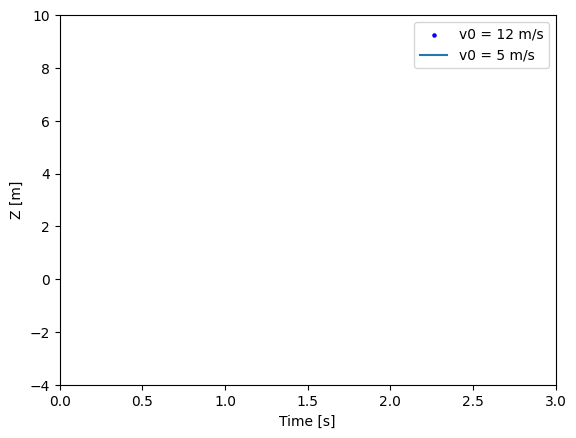

In [21]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = FuncAnimation(fig=fig, func=update, frames=40, interval=30)
